# Matplotlib Exercises

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#### 1. Reproduce the following figure
<img src="images/exercise_1.png">

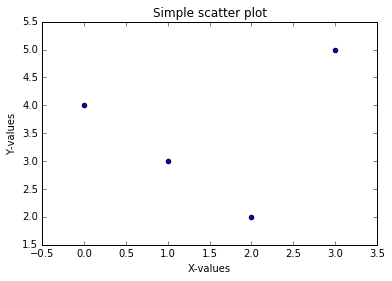

In [12]:
# Hint: use the scatter method
fig, ax = plt.subplots()
ax.scatter([0,1,2,3], [4,3,2,5])
ax.set_title("Simple scatter plot")
ax.set_xlabel("X-values")
ax.set_ylabel("Y-values");

#### 2. Reproduce the following figure

<img src="images/exercise_1-1.png">

#### Here's the data and some code to get you started.

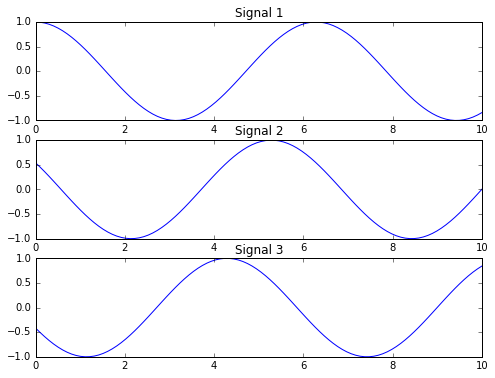

In [5]:
# Starter code
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']
# Tip: When the grid in plt.subplots has nrows=1 or ncols=1 the resultin axes object is a 1-dimension numpy array

# Your code here:
# Option 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
for y, name, ax in zip([y1, y2, y3], names, axes):
    ax.set_title(name)
    ax.plot(x, y)

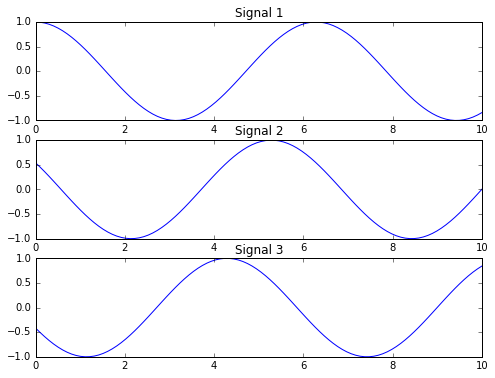

In [6]:
# Option 2
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

axes[0].set_title(names[0])
axes[0].plot(x, y1)

axes[1].set_title(names[1])
axes[1].plot(x, y2)

axes[2].set_title(names[2])
axes[2].plot(x, y3)

#### 3. The law of large numbers
In probability theory, the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

Here we visualize with a simulation that reproduces closely the graph presented in the wikipedia article.

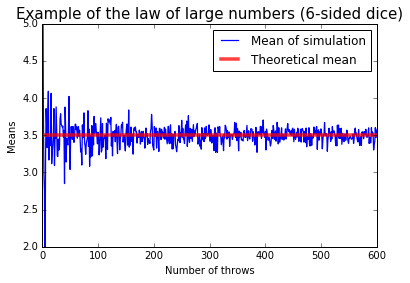

In [29]:
# Create a numpy array (number_of_throws) of integers from 1 to 600, hint: use arange
np.random.seed(123)
number_of_throws = np.arange(1, 601)

# For each integer in number_of_throws: simulate throwing a 6-sided dice and then take the mean of the values observed
# Save the means in a numpy array called means, 
# hint: initialize means with np.zeros(600)
# hint: the enumerate() function might be useful

means = np.zeros(600)
for i, n in enumerate(number_of_throws):
     means[i] = np.random.randint(1,7, size=n).mean()
    
# Plot number of number_of_throws against means using a line chart, interpret the results
fig, ax = plt.subplots()
ax.plot(number_of_throws, means, lw=1.25, color='b', label='Mean of simulation')
ax.axhline(y=3.5, color='r', lw=3.5, alpha= 0.75, label='Theoretical mean')
ax.set_title('Example of the law of large numbers (6-sided dice)', size=15)
ax.set_xlabel('Number of throws')
ax.set_ylabel('Means')
ax.set_ylim(2,5)
ax.legend();

#### 4. Using the following data produce a bar plot that shows the counts of the three kinds of medals for each country

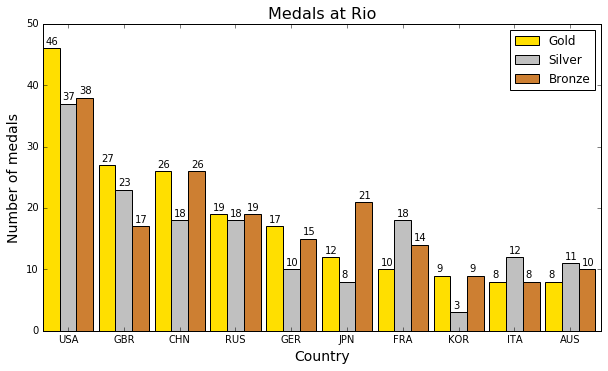

In [39]:
# Top 10 medal-winning countries in the Rio Olympics
countries = ['USA','GBR','CHN','RUS','GER','JPN','FRA','KOR','ITA','AUS']
gold = [46,27,26,19,17,12,10,9,8,8]
silver = [37,23,18,18,10,8,18,3,12,11]
bronze = [38,17,26,19,15,21,14,9,8,10]

# Hint: Use the following colors: (gold, #FFDF00), (silver, #C0C0C0), (bronze, #CD7F32)
# Your code here
fig, ax = plt.subplots(figsize=(10,5.5))
ax.bar(np.arange(10), gold, color="#FFDF00", width=0.3, label='Gold')
ax.bar(np.arange(10)+0.3, silver, color="#C0C0C0", width=0.3, label='Silver') 
ax.bar(np.arange(10)+0.6, bronze, color="#CD7F32", width=0.3, label='Bronze')

ax.set_xticks(np.arange(0.45,10.45,1))
ax.set_xticklabels(countries)

for x, g, s, b in zip(np.arange(10), gold, silver, bronze):
    ax.text(x+0.05,g+0.6,g)
    ax.text(x+0.35,s+0.6,s)
    ax.text(x+0.65,b+0.6,b)

ax.set_title('Medals at Rio', size=16)
ax.set_xlabel('Country', size=14)
ax.set_ylabel('Number of medals', size=14)
ax.legend(loc='upper right');

#### 5. Simulate tossing a fair coin 20 times, do the same simulation 1,000 times. Count the number of "heads" for each simulation (save them in an array ``counts``). Visualize the distribution of ``counts`` using the appropiate plot.

In [57]:
#Each column of this matrix will be one 20-tosses simulation
coin_matrix = np.random.randint(0,2,size=(20,1000)) 
#Counting the number of heads in each simulation (1 = "heads")
counts = coin_matrix.sum(axis=0)

number_of_heads = np.arange(0,21,1)
observed_times = np.bincount(counts) # Check out the documentation for the np.bincount function
observed_times = np.concatenate((observed_times, np.zeros(21-observed_times.size)))

print number_of_heads.size
print observed_times.size

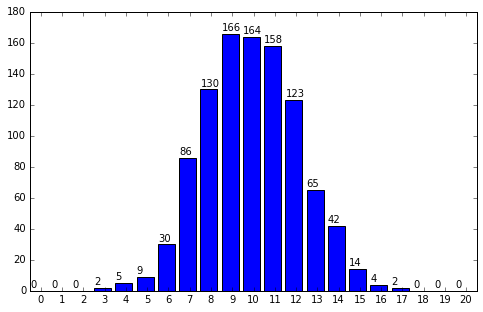

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(number_of_heads, observed_times)
ax.set_xticks(number_of_heads+0.5)
ax.set_xticklabels(number_of_heads)

for x, y in zip(number_of_heads, observed_times):
    ax.text(x, y + 2, "{:d}".format(int(y)))

ax.set_xlim(0,21);

#### 6. Using the following array, produce a grid of 9 histograms showing how they change depending on the number of bins, for bins use the integers from 10 to 18.

In [40]:
# IQ's scores from 125 people
iqs = np.random.normal(loc=100, scale=10, size=125)

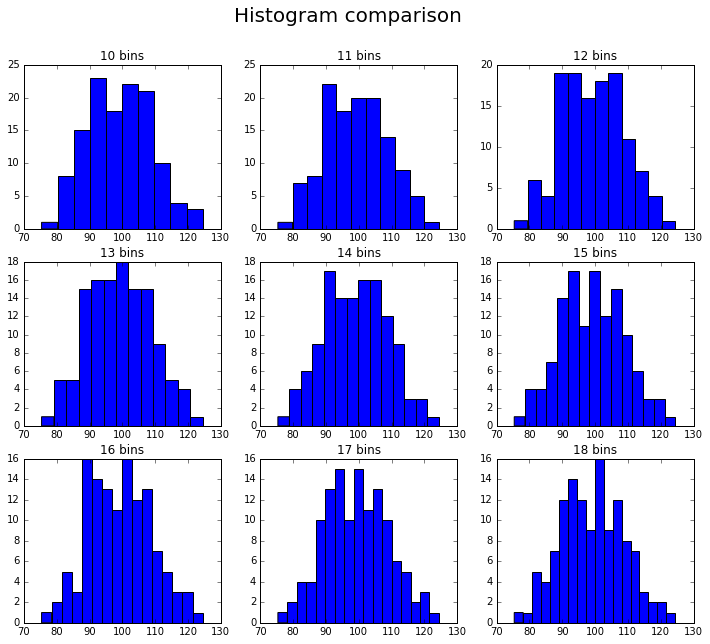

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
for i in range(9):
    n_bins = i+10
    ax.ravel()[i].hist(iqs, bins=n_bins)
    ax.ravel()[i].set_title(str(n_bins) + " bins")
    
fig.suptitle('Histogram comparison', fontsize=20);